In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [6]:
df = pd.read_json('all_opt.json', orient='index').sort_index()
df

,O2_n,Vol_mit,r_0,r_m,v_cn
0,0.021014,0.084000,0.011849,0.020967,30.000000
1,0.023886,0.084000,0.011840,0.021326,30.237286
2,0.020281,0.084000,0.011847,0.020973,30.000000
3,0.026622,0.084000,0.011845,0.020989,30.000000
4,0.027058,0.083995,0.011838,0.021414,30.302424
5,0.025712,0.084000,0.011839,0.021038,30.000000
6,0.024366,0.084000,0.011795,0.021374,30.000000
7,0.029131,0.084000,0.011830,0.021113,30.000000
8,0.025597,0.084000,0.011811,0.021230,30.000000
9,0.018280,0.084000,0.011839,0.021041,30.000000


KeyError: 'r_t'

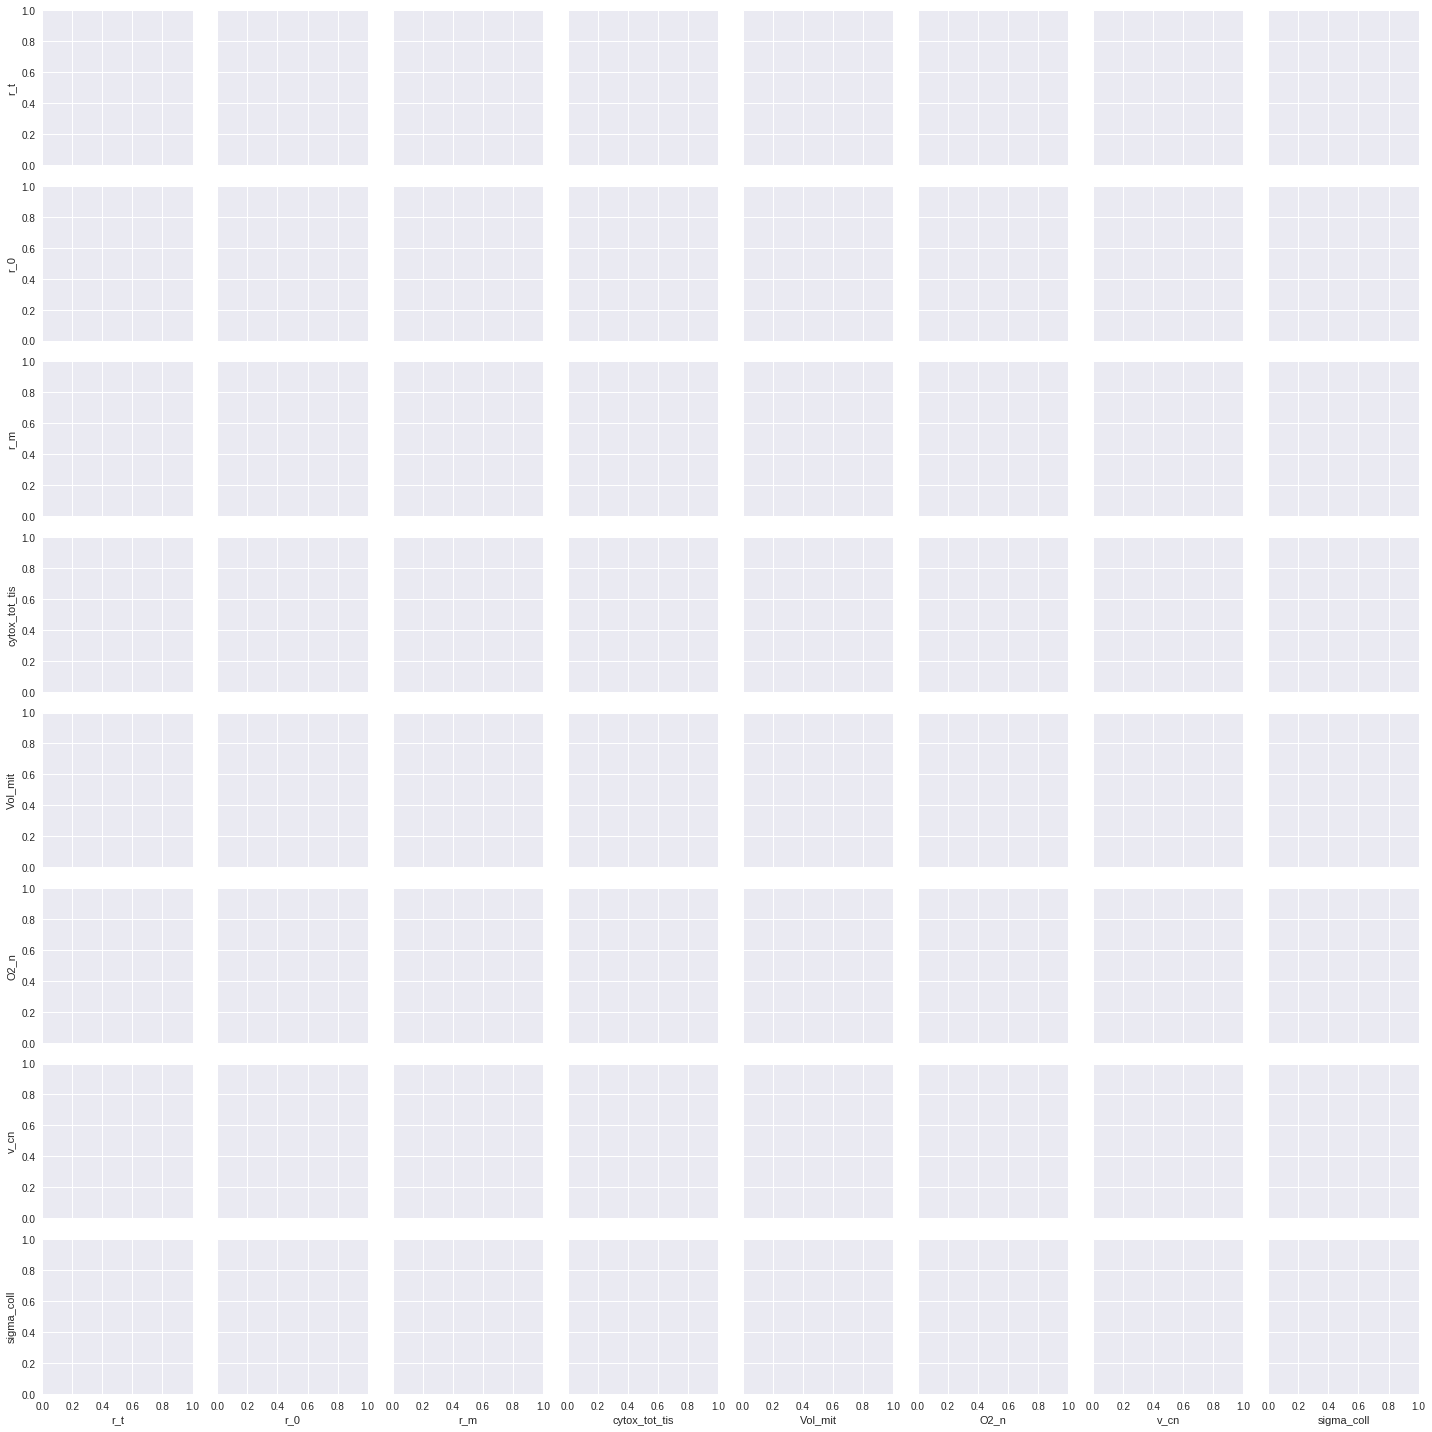

In [4]:
params=[r'r_t',r'r_0',r'r_m',r'cytox_tot_tis',r'Vol_mit',r'O2_n',r'v_cn',r'sigma_coll']
g = sns.PairGrid(df,vars=params)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
for ax in g.axes.flat:
    ax.ticklabel_format(useOffset=False)
    for label in ax.get_xticklabels():
        label.set_rotation(50)

## Get Distances ##

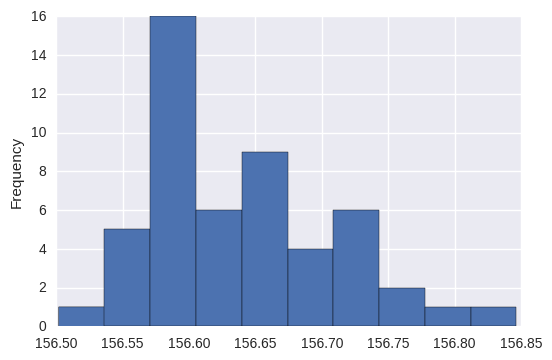

In [12]:
logs = [f for f in os.listdir('.') if f[-3:]=='log']
for ix in range(len(logs)):
    with open('optimisation_{}.log'.format(ix)) as f:
        c = f.readlines()
        df.loc[ix,'Distance'] = float(c[-7][-11:])

plt.ticklabel_format(useOffset=False)        
df['Distance'].plot(kind='hist', bins=10)

In [4]:
with open('opts_and_dist.json','w') as jsonf:
    print(df.to_json(orient='index'), file=jsonf)